<a href="https://colab.research.google.com/github/Viny2030/HUMAI/blob/main/ejercicio_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/3_Agrupacion_y_Agregacion/ejercicio/ejercicio.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

## Parte A
Para esta parte vamos a trabajar sobre el mismo DataFrame que usamos en clase pero agrupando a nivel de comunidad autónoma (Cod_CCAA). En este caso vamos a traer también las descripciones y vamos a hacer un join para formar un único data set.

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/3_Agrupacion_y_Agregacion/parodesprov.csv')

In [3]:
df.head()

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop
0,1,1001,Alegría-Dulantzi,1,16,184.0,2856.0,Araba/Álava,16.0,3.709269e+07,48191.568537,1.0
1,2,1002,Amurrio,1,16,766.0,10260.0,Araba/Álava,16.0,1.799114e+08,90623.621986,1.0
2,3,1003,Aramaio,1,16,18.0,1502.0,Araba/Álava,16.0,1.377066e+08,58592.914048,1.0
3,4,1004,Artziniega,1,16,110.0,1840.0,Araba/Álava,16.0,5.130078e+07,31498.524044,1.0
4,5,1006,Armiñón,1,16,12.0,234.0,Araba/Álava,16.0,2.380288e+07,33293.805036,1.0


In [4]:
df_descripciones = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/3_Agrupacion_y_Agregacion/ejercicios/comunidades_descripcion.csv')

In [5]:
df_descripciones.head()

,Código,Literal
0,1,Andalucía
1,2,Aragón
2,3,"Asturias, Principado de"
3,4,"Balears, Illes"
4,5,Canarias


Unan ambos DataFrames utilizando la función pd.merge()

In [6]:
df_final = pd.merge(df, df_descripciones, left_on='Cod_CCAA',right_on="Código")
df_final.head()

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop,Código,Literal
0,1,1001,Alegría-Dulantzi,1,16,184.0,2856.0,Araba/Álava,16.0,3.709269e+07,48191.568537,1.0,16,País Vasco
1,2,1002,Amurrio,1,16,766.0,10260.0,Araba/Álava,16.0,1.799114e+08,90623.621986,1.0,16,País Vasco
2,3,1003,Aramaio,1,16,18.0,1502.0,Araba/Álava,16.0,1.377066e+08,58592.914048,1.0,16,País Vasco
3,4,1004,Artziniega,1,16,110.0,1840.0,Araba/Álava,16.0,5.130078e+07,31498.524044,1.0,16,País Vasco
4,5,1006,Armiñón,1,16,12.0,234.0,Araba/Álava,16.0,2.380288e+07,33293.805036,1.0,16,País Vasco


Construir el DataFrame de comunidades autónomas, incluyendo la densidad, la proporción de paro y la cantidad de municipios.

In [7]:
# df comunidades autonomas

df_CCAA = df_final.groupby('Cod_CCAA').aggregate({
    'Literal': 'first',
    'PAD_1C02': 'sum',
    'Shape__Area': 'sum',
    'TotalParoRegistrado': 'sum',
    'Codigo': 'count'
})

df_CCAA = df_CCAA.rename(columns={'Codigo': 'CantMunicipios', 'Literal': 'Nombre_CCAA'})

df_CCAA.head()

,Nombre_CCAA,PAD_1C02,Shape__Area,TotalParoRegistrado,CantMunicipios
Cod_CCAA,,,,,
1,Andalucía,16767927.0,2.786058e+11,1786171.0,1556
2,Aragón,2617313.0,1.704497e+11,162412.0,1462
3,"Asturias, Principado de",2077568.0,4.004387e+10,172450.0,156
4,"Balears, Illes",2223219.0,1.679532e+10,131888.0,134
5,Canarias,4210045.0,1.924110e+10,462611.0,176


In [8]:
# Densidad
df_CCAA['Densidad'] = df_CCAA['PAD_1C02'] / df_CCAA['Shape__Area']

In [9]:
# Proporcion de paro
df_CCAA['Proporcion_Paro'] =  df_CCAA['TotalParoRegistrado'] / df_CCAA['PAD_1C02']

In [10]:
df_CCAA.head()

,Nombre_CCAA,PAD_1C02,Shape__Area,TotalParoRegistrado,CantMunicipios,Densidad,Proporcion_Paro
Cod_CCAA,,,,,,,
1,Andalucía,16767927.0,2.786058e+11,1786171.0,1556,0.000060,0.106523
2,Aragón,2617313.0,1.704497e+11,162412.0,1462,0.000015,0.062053
3,"Asturias, Principado de",2077568.0,4.004387e+10,172450.0,156,0.000052,0.083006
4,"Balears, Illes",2223219.0,1.679532e+10,131888.0,134,0.000132,0.059323
5,Canarias,4210045.0,1.924110e+10,462611.0,176,0.000219,0.109883


Habíamos visto que el promedio de la proporción de paro en los municipios con una densidad menor a la mediana es más bajo.. ¿Se cumple lo mismo para las provincias?

In [11]:
# Densidad provincia
df_final['densidad'] = df_final['PAD_1C02'] / df_final['Shape__Area']

In [12]:
# Proporcion de paro provincia
df_final['proporcion_paro'] =  df_final['TotalParoRegistrado'] / df_final['PAD_1C02']

In [13]:
# Armamos el df por provincia
df_prov = df_final.groupby('Cod_Prov')[['densidad', 'proporcion_paro']].mean()
df_prov.head()

,densidad,proporcion_paro
Cod_Prov,,
1,0.000031,0.046115
2,0.000009,0.108226
3,0.000184,0.074466
4,0.000056,0.072556
5,0.000007,0.058510


In [14]:
# Proporcion de paro en provincias con densidad menor a la mediana
df_prov.query('densidad < densidad.median()')['proporcion_paro'].mean()

0.060666461283987144

In [15]:
# Proporcion de paro en provincias con densidad mayor a la mediana
df_prov.query('densidad >= densidad.median()')['proporcion_paro'].mean()

0.07860675470615039

¿Cuál es la comunidad autónoma con mayor cantidad de municipios?

In [16]:
# nunique cuenta los valores únicos

df_final.groupby('Cod_CCAA')['Codigo'].nunique().sort_values(ascending=False)

,Codigo
Cod_CCAA,
7,2248
9,947
8,919
1,778
2,731
10,542
11,388
15,317
12,315


## Parte B
Para esta parte de la práctica usaremos los datos abiertos de CABA, a partir de un relevamiento muestral de los avisos publicados para la venta de departamentos en el año 2020.

https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta

In [17]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [18]:
df = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv", encoding = "latin1", sep=",")

In [19]:
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


Hacer un primer análisis del dataset y analizar nulos.

In [20]:
df.isnull().sum()

,0
DIRECCION,6
PROPIEDADS,0
PRECIOUSD,0
PRECIOPESO,0
DOLARM2,0
PESOSM2,0
COTIZACION,0
TRIMESTRE_,0
BARRIO,0
COMUNA_,0


Sabemos que tenemos direcciones nulas. Luego al utilizar esa columna lo vamos a tener que tener en cuenta.

array([[<Axes: title={'center': 'PROPIEDADS'}>,
        <Axes: title={'center': 'PRECIOUSD'}>,
        <Axes: title={'center': 'PRECIOPESO'}>],
       [<Axes: title={'center': 'DOLARM2'}>,
        <Axes: title={'center': 'PESOSM2'}>,
        <Axes: title={'center': 'COTIZACION'}>],
       [<Axes: title={'center': 'COMUNA_'}>, <Axes: >, <Axes: >]],
      dtype=object)

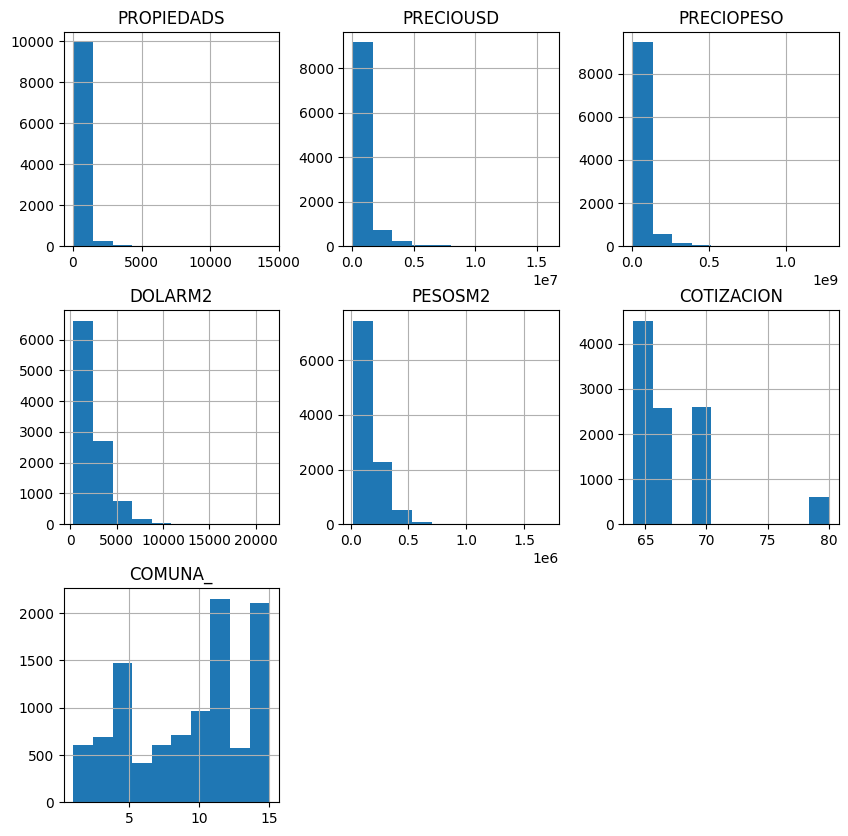

In [21]:
df.hist(figsize=(10,10))

Los trimestres aparecen como strings. En ese caso puedo hacer un value_counts() o reemplazar los valores por números para ver el histograma de esa columna.

In [22]:
df["TRIMESTRE_"].unique()

array(['CUARTO', 'PRIMER', 'SEGUNDO', 'TERCER'], dtype=object)

In [23]:
reemplazo = {'PRIMER': 1, 'SEGUNDO': 2, 'TERCER': 3, 'CUARTO': 4}
df['TRIMESTRE_'] = df['TRIMESTRE_'].replace(reemplazo)

<ipython-input-23-79ccb5aab184>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TRIMESTRE_'] = df['TRIMESTRE_'].replace(reemplazo)


In [24]:
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,4,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,4,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,4,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,4,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,4,ALMAGRO,5


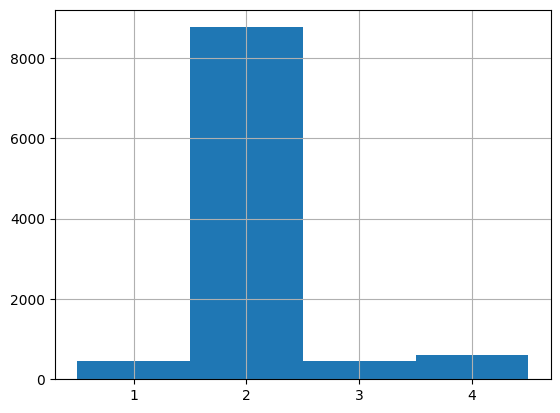

In [25]:
df["TRIMESTRE_"].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5]).set_xticks([1, 2, 3, 4])

#df["TRIMESTRE_"].hist()

Vemos que el muestreo principal fue durante el segundo trimestre del año, por lo que el análisis trimestral puede ser complicado.

### Ejercicio 1.
#### ¿Cuál es el precio medio del metro cuadrado en la Ciudad de Buenos Aires?

In [26]:
# Calcular el promedio de la columna "DOLARM2"
precio_medio_m2 = df['DOLARM2'].mean()

# Imprimir el resultado
print(f"El precio medio del metro cuadrado en la Ciudad de Buenos Aires es de {precio_medio_m2:.2f} dólares.")

El precio medio del metro cuadrado en la Ciudad de Buenos Aires es de 2357.65 dólares.


### Ejercicio 2.
#### a) Dividir las propiedades por cuartiles de precios en dólares.

In [27]:
df['CUARTIL'] = pd.qcut(df['PRECIOUSD'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

#### b) ¿Cuáles son los barrios con más domicilios en venta dentro del cuartil más barato de CABA?

Usar pivot_table

In [28]:
# Calcular una tabla pivot que cuenta la cantidad de domicilios por barrio y cuartil
tabla = pd.pivot_table(df, values='PROPIEDADS', index='BARRIO', columns='CUARTIL', aggfunc='count')

# Seleccionar la columna correspondiente al cuartil más barato y ordenar de mayor a menor
barrios_cu1 = tabla['Q1'].sort_values(ascending=False)

# Imprimir los 5 barrios con más domicilios en venta en el cuartil más barato
print("Los 5 barrios con más domicilios en venta dentro del cuartil más barato son:")
print(barrios_cu1.head(5))

Los 5 barrios con más domicilios en venta dentro del cuartil más barato son:
BARRIO
MATADEROS           171
PARQUE PATRICIOS    120
NUEVA POMPEYA       114
SAN CRISTOBAL       104
BOCA                104
Name: Q1, dtype: int64


<ipython-input-28-0ecde391a3e0>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = pd.pivot_table(df, values='PROPIEDADS', index='BARRIO', columns='CUARTIL', aggfunc='count')


In [29]:
barrios_cu1.head(5)

,Q1
BARRIO,
MATADEROS,171
PARQUE PATRICIOS,120
NUEVA POMPEYA,114
SAN CRISTOBAL,104
BOCA,104


#### ¿Y usando groupby?

In [30]:
# Agrupar los datos por barrio y cuartil de precios, y contar la cantidad de domicilios en venta
df_agrupado = df.groupby(['BARRIO', 'CUARTIL'])['DIRECCION'].count()

# Seleccionar los grupos correspondientes al cuartil más barato y ordenar de mayor a menor
df_agrupado_cu1 = df_agrupado.loc[:, 'Q1'].sort_values(ascending=False)

# Imprimir los 5 barrios con más domicilios en venta en el cuartil más barato
print("Los 5 barrios con más domicilios en venta dentro del cuartil más barato son:")
print(df_agrupado_cu1.head(5))

Los 5 barrios con más domicilios en venta dentro del cuartil más barato son:
BARRIO
MATADEROS           171
PARQUE PATRICIOS    119
NUEVA POMPEYA       114
SAN CRISTOBAL       104
BOCA                104
Name: DIRECCION, dtype: int64


<ipython-input-30-9bf189671e25>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby(['BARRIO', 'CUARTIL'])['DIRECCION'].count()


In [31]:
df.groupby(['BARRIO', 'CUARTIL']).count()["PROPIEDADS"].loc[:,'Q1'].sort_values(ascending=False)


<ipython-input-31-52f04595314c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['BARRIO', 'CUARTIL']).count()["PROPIEDADS"].loc[:,'Q1'].sort_values(ascending=False)


,PROPIEDADS
BARRIO,
MATADEROS,171
PARQUE PATRICIOS,120
NUEVA POMPEYA,114
SAN CRISTOBAL,104
BOCA,104
LINIERS,99
PARQUE AVELLANEDA,97
VELEZ SARSFIELD,96
VILLA URQUIZA,92


#### ¿Hay otra forma más sencilla?

In [32]:
df[df['CUARTIL'] == 'Q1']['BARRIO'].value_counts().head()

,count
BARRIO,
MATADEROS,171
PARQUE PATRICIOS,120
NUEVA POMPEYA,114
BOCA,104
SAN CRISTOBAL,104


### Ejercicio 3.
#### ¿Se puede calcular el tamaño de las propiedades?

In [33]:
# Calcular el tamaño de las propiedades en metros cuadrados
df['TAMANIO_M2'] = df['PRECIOPESO'] / df['PESOSM2']

In [34]:
df

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_,CUARTIL,TAMANIO_M2
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,4,ALMAGRO,5,Q1,189.99968
1,PRINGLES 100,242,230000,18400000,950,76033,80,4,ALMAGRO,5,Q1,242.00018
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,4,ALMAGRO,5,Q1,210.99986
3,MEXICO 4000,320,300000,24000000,938,75000,80,4,ALMAGRO,5,Q1,320.00000
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,4,ALMAGRO,5,Q1,250.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
10296,"BONORINO, ESTEBAN, Cnel. 300",149,430000,27412500,2886,183976,64,1,FLORES NORTE,7,Q2,149.00041
10297,RIVERA INDARTE 100,500,790000,50362500,1580,100725,64,1,FLORES NORTE,7,Q3,500.00000
10298,"ALVAREZ, DONATO, Tte. Gral. 200",771,690000,43987500,895,57052,64,1,FLORES NORTE,7,Q3,771.00715
10299,"ALBERDI, JUAN BAUTISTA 3100",409,800000,51000000,1956,124694,64,1,FLORES NORTE,7,Q3,409.00124


#### ¿Cuál sería el precio promedio de las propiedades para cada decil, según metros cuadrados?

In [35]:
# Dividir los datos en deciles según el tamaño de las propiedades
deciles_tamanio = pd.qcut(df['TAMANIO_M2'], q=10)

# Calcular el precio promedio por metro cuadrado para cada decil de tamaño
precios_promedio_por_decil = df.groupby(deciles_tamanio)['DOLARM2'].mean().reset_index().sort_values(by="TAMANIO_M2",ascending=True)

# Cambiar los nombres de las columnas
precios_promedio_por_decil = precios_promedio_por_decil.rename(columns={'DOLARM2': 'precio_prom_m2'})

<ipython-input-35-361ca0b28b69>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precios_promedio_por_decil = df.groupby(deciles_tamanio)['DOLARM2'].mean().reset_index().sort_values(by="TAMANIO_M2",ascending=True)


In [36]:
precios_promedio_por_decil["decil"] = range(1,11)

In [37]:
precios_promedio_por_decil

,TAMANIO_M2,precio_prom_m2,decil
0,"(29.999, 148.001]",3042.19205,1
1,"(148.001, 180.001]",2637.23159,2
2,"(180.001, 217.0]",2706.39105,3
3,"(217.0, 250.0]",2459.63619,4
4,"(250.0, 291.0]",2435.20396,5
5,"(291.0, 339.0]",2204.71165,6
6,"(339.0, 390.002]",2037.20485,7
7,"(390.002, 492.998]",2069.82524,8
8,"(492.998, 834.009]",2114.02233,9
9,"(834.009, 14303.089]",1869.08447,10


<Axes: xlabel='decil'>

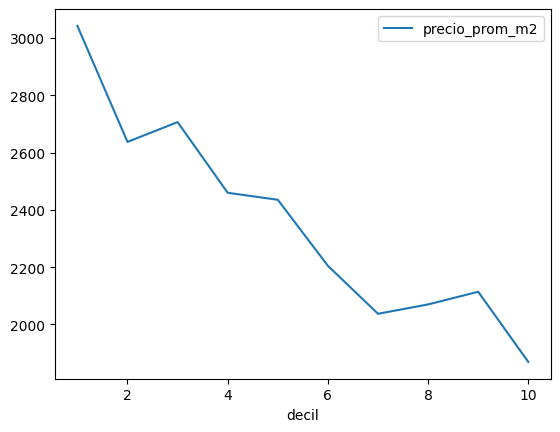

In [38]:
precios_promedio_por_decil

precios_promedio_por_decil.plot(x='decil', y='precio_prom_m2')


### Ejercicio 4.

#### ¿Cuáles son los barrios más caros en términos de precios por metro cuadrado? ¿Y los más baratos?


In [39]:
# Calcular el precio promedio por metro cuadrado en cada barrio
precio_promedio_por_barrio = df.groupby('BARRIO')['DOLARM2'].mean().reset_index()

# Ordenar los barrios por precio promedio de mayor a menor
barrios_mas_caros = precio_promedio_por_barrio.sort_values(by='DOLARM2', ascending=False)

# Imprimir los barrios más caros
print("Los barrios más caros en términos de precios por metro cuadrado son:")
print(barrios_mas_caros.head())

# Imprimir los barrios más baratos
print("Los barrios más baratos en términos de precios por metro cuadrado son:")
print(barrios_mas_caros.tail())

Los barrios más caros en términos de precios por metro cuadrado son:
           BARRIO    DOLARM2
30       RECOLETA 5834.18750
31         RETIRO 5284.16667
29  PUERTO MADERO 4906.00000
5        BELGRANO 4302.16605
23        PALERMO 4283.04671
Los barrios más baratos en términos de precios por metro cuadrado son:
             BARRIO    DOLARM2
6              BOCA 1086.25764
43     VILLA LUGANO  908.55000
4    BARRACAS OESTE  742.00000
48  VILLA RIACHUELO  661.27027
50    VILLA SOLDATI  593.19048


### Ejercicio 5

#### Dado el siguiente DataFrame con departamentos en venta en CABA en 2019: https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta/resource/c9a6fed8-da1d-460e-92a8-e0213d68f59c

#### ¿Qué porcentaje de propiedades que estaban en venta durante 2019 siguieron estando en 2020?

In [40]:
df_2019 = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2019.csv")

In [41]:
df_2019["OPERACION"].value_counts()

,count
OPERACION,
VTA,5002
ALQ,4


In [42]:
df_2019 = df_2019[df_2019["OPERACION"]=="VTA"]

In [43]:
df_2019.head()

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
0,VTA,TERRENO,-34.6294378,-58.4498948,235.00000,Malvinas Argentinas al 400,45.00,1100000.00000,49500000,4681.00000,210645.00000,CABALLITO,6
1,VTA,TERRENO,-34.6289663,-58.4483573,1629.00000,Jose Bonifacio 1520,45.00,1400000.00000,63000000,859.00000,38655.00000,CABALLITO,6
2,VTA,TERRENO,-34.6265344,-58.4326234,438.00000,BONIFACIO JOSE 400,45.00,2380000.00000,107100000,1062.00000,47790.00000,CABALLITO,6
3,VTA,TERRENO,-34.6248406,-58.4317985,272.00000,VIEL al 600,45.00,895000.00000,40275000,3290.00000,148050.00000,CABALLITO,6
4,VTA,TERRENO,-34.622629,-58.44079,600.00000,Av. Del Barco Centenera 200,45.00,400000.00000,18000000,667.00000,30015.00000,CABALLITO,6


Primer pantallazo del df.

In [44]:
# Merge de los DataFrames usando la columna 'DIRECCION'
merged_df = pd.merge(df_2019, df, how='inner', left_on='DIRECCION', right_on='DIRECCION')

# Cálculo del porcentaje de propiedades que estaban en venta en 2019 y siguieron en 2020
porcentaje = (len(merged_df) / len(df_2019)) * 100

In [45]:
porcentaje

46.30147940823671

#### Extra: ¿qué modificaciones habría que hacer para encontrar más coincidencias? ¿Qué consideraciones habría que tomar a la hora de analizar el resultado?

Podríamos estandarizar las direcciones:

In [46]:
# Eliminamos nulos
df_2019 = df_2019[df_2019['DIRECCION'].notna()]
df = df[df['DIRECCION'].notna()]

# Función para estandarizar las direcciones
def standardize_address(address):
    return address.strip().upper()

# Aplicar la función de estandarización a las direcciones en ambos DataFrames
df_2019['DIRECCION'] = df_2019['DIRECCION'].apply(standardize_address)
df['DIRECCION'] = df['DIRECCION'].apply(standardize_address)

<ipython-input-46-f3fe91460255>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DIRECCION'] = df['DIRECCION'].apply(standardize_address)


In [47]:
# Merge de los DataFrames usando la columna 'DIRECCION'
merged_df = pd.merge(df_2019, df, how='inner', left_on='DIRECCION', right_on='DIRECCION')

# Cálculo del porcentaje de propiedades que estaban en venta en 2019 y siguieron en 2020
porcentaje = (len(merged_df) / len(df_2019)) * 100
porcentaje

69.82533627785585

Podríamos eliminar duplicados con ```drop_duplicates()```. Este método lo vamos a ver más adelante, pero permite eliminar filas duplicadas. Por defecto elimina las que son en su totalidad iguales, pero utilizando el parámetro ```subset``` podemos seleccionar una columna (o varias) en particular que queremos utilizar como filtro

En este caso, queremos eliminar las filas con la dirección repetida.




In [48]:
print("Dataset original en 2019:")
print(df_2019.shape)
print("Filas repetidas en 2019:")
print(df_2019[df_2019.duplicated(subset="DIRECCION")].shape)

Dataset original en 2019:
(4981, 13)
Filas repetidas en 2019:
(1729, 13)


In [49]:
df_2019[df_2019.duplicated(subset="DIRECCION")]

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
177,VTA,TERRENO,-34.6166421,-58.4067744,251.00000,DEAN FUNES AL 500,45.00,370000.00000,16650000,1474.00000,66330.00000,BALVANERA,3
216,VTA,TERRENO,-34.6022826,-58.4402184,206.00000,PADILLA AL 300,45.00,900000.00000,40500000,4369.00000,196605.00000,VILLA CRESPO,15
218,VTA,TERRENO,-34.6022521,-58.4344461,208.00000,VERA AL 100,45.00,800000.00000,36000000,3846.00000,173070.00000,VILLA CRESPO,15
221,VTA,TERRENO,-34.602086476108,-58.446829554282,416.00000,OLAYA AL 1600,45.00,500000.00000,22500000,1202.00000,54090.00000,VILLA CRESPO,15
229,VTA,TERRENO,-34.5988758,-58.4335141,346.00000,MUY BUEN LOTE INCIDENCIA MENOR A 600 DLS M2 J...,45.00,1350000.00000,60750000,3902.00000,175590.00000,VILLA CRESPO,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,VTA,TERRENO,-34.6283595,-58.4570897,202.00000,RAMON FALCON AL 1900,60.50,1550000.00000,93775000,7673.00000,464217.00000,FLORES NORTE,7
5000,VTA,TERRENO,-34.6187647,-58.4669925,134.00000,BUFANO ALFREDO R. AL 1000,60.50,349000.00000,21114500,2604.00000,157542.00000,FLORES NORTE,7
5001,VTA,TERRENO,-34.6184882,-58.46834125,552.00000,ARTIGAS AL 1000,60.50,850000.00000,51425000,1540.00000,93170.00000,FLORES NORTE,7
5004,VTA,TERRENO,-34.621818,-58.473141,425.00000,FLORES NAZCA Y PAEZ,60.50,1000000.00000,60500000,2353.00000,142357.00000,FLORES NORTE,7


In [50]:
print("Dataset original en 2020:")
print(df.shape)
print("Filas repetidas en 2020:")
print(df[df.duplicated(subset="DIRECCION")].shape)

Dataset original en 2020:
(10295, 12)
Filas repetidas en 2020:
(6850, 12)


In [51]:
df[df.duplicated(subset="DIRECCION")].sort_values(by="DIRECCION")

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_,CUARTIL,TAMANIO_M2
6388,.ANDONAEGUI,364,450000,31275000,1236,85920,70,2,PARQUE CHAS,15,Q2,364.00140
8054,.ANDONAEGUI,364,450000,30240000,1236,83077,67,2,PARQUE CHAS,15,Q2,363.99966
6383,.CAMPILLO,364,500000,34750000,1374,95467,70,2,PARQUE CHAS,15,Q2,364.00013
8055,.CAMPILLO,364,500000,33600000,1374,92308,67,2,PARQUE CHAS,15,Q2,363.99879
9163,1 DE MAYO 1800,208,100000,6720000,481,32308,67,2,NUEVA POMPEYA,4,Q1,207.99802
...,...,...,...,...,...,...,...,...,...,...,...,...
5711,ZUVIRIA,433,330000,22935000,762,52968,70,2,FLORES SUR,7,Q1,432.99728
3652,ZUVIRIA,433,330000,21120000,762,48776,64,2,FLORES SUR,7,Q1,432.99984
8929,ZUVIRIA,433,330000,22176000,762,51215,67,2,FLORES SUR,7,Q1,432.99815
6404,ÃLVAREZ JONTE 2100,244,370000,25715000,1516,105389,70,2,PATERNAL,15,Q2,244.00080


In [52]:
df_2019_sind = df_2019.drop_duplicates(subset="DIRECCION")
df_sind = df.drop_duplicates(subset="DIRECCION")

In [53]:
print(df_2019_sind.shape)
print(df_sind.shape)

(3252, 13)
(3445, 12)


In [54]:
df_2019_sind.shape

(3252, 13)

In [55]:
# Merge de los DataFrames usando la columna 'DIRECCION'
merged_df = pd.merge(df_2019_sind, df_sind, how='inner', left_on='DIRECCION', right_on='DIRECCION')

# Cálculo del porcentaje de propiedades que estaban en venta en 2019 y siguieron en 2020
porcentaje = (len(merged_df) / len(df_2019)) * 100
porcentaje

13.692029712909054

El porcentaje disminuye muchísimo. Otras opciones posibles son la de ampliar el horizonte de dropeo de duplicados (tomar no solo la dirección como subset sino también que sean propiedades que coincidan bastante en metros cuadrados) o Procesamientos de Lenguaje Natural (NLP) que permitan estandarizar aún más las direcciones (esto último excede al curso actual).

### Ejercicio 6
#### Agregar una columna al DataFrame ```df``` que indique si la propiedad se encuentra en un barrio del centro (BARRIO es San Nicolás, Monserrat o Retiro) o no.

In [56]:
centro_barrios = ['SAN NICOLAS', 'MONSERRAT', 'RETIRO']
df_2019['CENTRO'] = 'NO'
df_2019.loc[df_2019['BARRIOS'].str.upper().isin(centro_barrios), 'CENTRO'] = 'SI'

#### Crear una columna que muestre la diferencia entre el precio en dólares de cada propiedad y el promedio del barrio en el que se encuentra, para el año 2019.
Nota: investigar la función transform()

In [57]:
df_2019

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA,CENTRO
0,VTA,TERRENO,-34.6294378,-58.4498948,235.00000,MALVINAS ARGENTINAS AL 400,45.00,1100000.00000,49500000,4681.00000,210645.00000,CABALLITO,6,NO
1,VTA,TERRENO,-34.6289663,-58.4483573,1629.00000,JOSE BONIFACIO 1520,45.00,1400000.00000,63000000,859.00000,38655.00000,CABALLITO,6,NO
2,VTA,TERRENO,-34.6265344,-58.4326234,438.00000,BONIFACIO JOSE 400,45.00,2380000.00000,107100000,1062.00000,47790.00000,CABALLITO,6,NO
3,VTA,TERRENO,-34.6248406,-58.4317985,272.00000,VIEL AL 600,45.00,895000.00000,40275000,3290.00000,148050.00000,CABALLITO,6,NO
4,VTA,TERRENO,-34.622629,-58.44079,600.00000,AV. DEL BARCO CENTENERA 200,45.00,400000.00000,18000000,667.00000,30015.00000,CABALLITO,6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,VTA,TERRENO,-34.6184882,-58.46834125,552.00000,ARTIGAS AL 1000,60.50,850000.00000,51425000,1540.00000,93170.00000,FLORES NORTE,7,NO
5002,VTA,TERRENO,-34.631988,-58.464822,223.00000,ALBERDI 2600,60.50,580000.00000,35090000,2601.00000,157361.00000,FLORES NORTE,7,NO
5003,VTA,TERRENO,-34.626819,-58.4621,229.00000,CARACAS 100,60.50,350000.00000,21175000,1528.00000,92444.00000,FLORES NORTE,7,NO
5004,VTA,TERRENO,-34.621818,-58.473141,425.00000,FLORES NAZCA Y PAEZ,60.50,1000000.00000,60500000,2353.00000,142357.00000,FLORES NORTE,7,NO


In [58]:
df_2019['DIF_PROMEDIO_BARRIO'] = df_2019['PRECIOUSDM'] - df_2019.groupby('BARRIOS')['PRECIOUSDM'].transform('mean')

In [59]:
df_2019["DIRECCION"].value_counts()

,count
DIRECCION,
DARWIN AL 200,27
RIO DE JANEIRO AL 1000,21
OLAYA AL 1600,18
PADILLA AL 300,16
CORRIENTES AL 6100,16
...,...
PRESIDENTE JOSE EVARISTO URIBURU 1000,1
VIDAL AL 2900,1
ZABALA AL 3600,1


#PandasAI

In [60]:
!pip install pandasai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [61]:
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

ImportError: cannot import name 'PandasAI' from 'pandasai' (/usr/local/lib/python3.11/dist-packages/pandasai/__init__.py)

In [ ]:
OPENAI_API_KEY = "YOUR_OPENAI_KEY"
llm = OpenAI(api_token=OPENAI_API_KEY)

In [ ]:
pandas_ai = PandasAI(llm)

In [ ]:
pandas_ai.run(df_2019_sind, prompt='Cuáles son los nombres de calles que más se repiten, sin tener en cuenta la altura?')

También se puede plotear:

In [ ]:
pandas_ai.run(df_sind, "Plot any horizontal bar chart with quartiles and dollars per m2")